## Sección 1

### 1. Introducción y explicar en que consiste el artículo que trata sus datos:
#### El artículo en sí trata sobre el manejo de de la hiperglucemia en pacientes hospitalizados, examenes de el uso de HbA1c como marcador de atención al cuidado de la diabetes en un gran número de personas identificadas con diagnóstico de diabetes mellitus. Nos comentan que las bases de datos (74 millones de encuentros únicos correspondientes a 17 millones de pacientes únicos) de datos clínicos contienen datos valiosos pero heterogéneos y difíciles en términos de valores perdidos, registros incompletos o inconsistentes y alta dimensionalidad entendida no solo por el número de características sino también por su complejidad. No obstante, es importante utilizar estas enormes cantidades de datos para encontrar nueva información / conocimiento que posiblemente no esté disponible en ninguna parte. Este estudio utilizó la base de datos Health Facts. La base de datos contiene datos recopilados sistemáticamente de los registros médicos electrónicos de las instituciones participantes e incluye datos de encuentros (emergencias, pacientes ambulatorios y pacientes hospitalizados). Los datos a utilizar en dicha base de datos son un extracto de aproximadamente 10 años (1999-2008) de atención clínica en 130 hospitales.
### 2. Cuáles fueron los métodos empleados en el artículo:
#### Se extrajo información de la base de datos para los encuentros que cumplieron con los siguientes criterios.
#### (1)	Es un encuentro hospitalario (ingreso hospitalario).
#### (2)	Es un encuentro “diabético”, es decir, durante el cual se ingresó al sistema cualquier tipo de diabetes como diagnóstico.
#### (3)	La estancia hospitalaria fue de al menos 1 día y como máximo 14 días.
#### (4)	Durante el encuentro se realizaron pruebas de laboratorio.
#### (5)	Se administraron medicamentos durante el encuentro.
#### Se aplicaron criterios para eliminar las admisiones para procedimientos, etc., que fueron de menos de 23 horas de duración y en las que era menos probable que se produjeran cambios en el manejo de la diabetes. Se identificaron 101,766 encuentros para cumplir con los cinco criterios de inclusión anteriores y se utilizaron en un análisis adicional. Se identificaron 101,766 encuentros para cumplir con los cinco criterios de inclusión anteriores y se utilizaron en un análisis adicional. Los expertos clínicos realizaron la selección de características y sólo se centraron en las que estaban asociadas directamente a la diabetes o al tratamiento de la misma.
### 3. Describir los principales resultados del artículo:
#### La medición de HbA1c fue poco frecuente, ocurriendo solo en el 18,4%. De aquellos en los que se solicitó la prueba, el 51,4% eran menos del 8%. Cuando no se obtuvo una HbA1c, el 42,5% de los pacientes tuvo un cambio de medicación durante la hospitalización. Dado que la variable de género no fue significativa en el modelo central (sin HbA1c), se eliminó del análisis posterior. El modelo final sugiere que la relación entre la probabilidad de reingreso y la medición de HbA1c depende significativamente del diagnóstico primario. Las predicciones se calcularon con el valor medio del tiempo en el hospital y en niveles de referencia de otras covariables. No hubo interacción significativa con otros diagnósticos primarios. En promedio, las estancias hospitalarias en el actual conjunto de datos fueron de 4,27 días, lo que permitiría examinar la atención de la diabetes y desarrollar un plan de cambio en caso de que se justificara.
### 4. Conclusiones o discusiones a las que llegaron los investigadores:
#### La principal conclusión a la que llegaron los investigadores es que la decisión de obtener una medición de HbA1c en pacientes con diabetes mellitus es un predictor útil de las tasas de reingreso, que puede resultar valioso en el desarrollo de estrategias para reducir las tasas de reingreso y los costos para la atención de personas con diabetes mellitus. Si bien las tasas de reingreso siguieron siendo las más altas para los pacientes con diagnósticos circulatorios, las tasas de reingreso para los pacientes con diabetes parecieron estar asociadas con la decisión de realizar la prueba de HbA1c, más que con los valores del resultado de HbA1c.
### 5. Comentar que le parece a usted este tipo de investigación y que es lo que le pareció más interesante del artículo:
#### Me parece que las investigaciones del área de la salud en general siempre son beneficiosas y con buenos fines, y este caso no es la excepción, ya que fuera de los resultados, también uno adquiere nuevos conociemientos como el HbA1c. Lo más interesante que me pareció del artículo es la cantidad de datos, en éste caso clínicos, que se manejan ya sea con o sin fines de investigación, a demás de todos los criterios que se utilizaron durante el estudio.

## Sección 2

#### Importamos las librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns

#### Con ayuda del método Pandas, cargamos la tabla con los datos

In [2]:
diabetes = pd.read_csv('data/diabetic_data.csv')
diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Gracias a la función describe del método scipy nos ayudara a sacar los siguientes elementos de estadisticas
##### - Primeramente vemos que con el count nos ayuda a ver cuantas filas hay en cada columna
##### - Con el mean nos ayuda a sacar el promedio o media aritmetica de cada una de las columnas
##### -También, vemos que en la fila "std" se nos muestra la disperción de los datos, esto quiere decir que nos ayuda a sacar la desviacion estandar
##### -Además, se imprimen los valores mínimos y máximos de cada columna junto a sus respectivos cuartiles
##### -(1er cuartil (Q1)	25% de los datos es menor que o igual a este valor. 2do cuartil (Q2)	La mediana. 50% de los datos es menor que o igual a este valor. 3er cuartil (Q3)	75% de los datos es menor que o igual a este valor.)

In [3]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## Con ayuda del método median de Pandas calcularemos la mediana, moda, varianza
#### (No se imprimen todas las columnas ya que algunos datos son de tipo object)
## MEDIANA
#### Nos dara el valor de la variable que deja el mismo número de de datos antes y después de él, una vez ordenados estos

In [4]:
mediana = diabetes.median()
mediana

encounter_id                152388987.0
patient_nbr                  45505143.0
admission_type_id                   1.0
discharge_disposition_id            1.0
admission_source_id                 7.0
time_in_hospital                    4.0
num_lab_procedures                 44.0
num_procedures                      1.0
num_medications                    15.0
number_outpatient                   0.0
number_emergency                    0.0
number_inpatient                    0.0
number_diagnoses                    8.0
dtype: float64


## MODA
#### Nos dara el valor de la variable que tiene mayor frecuencia en la muestra, es decir, el que más veces se repite

In [5]:
moda = diabetes.mode()
moda

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,12522,88785891.0,Caucasian,Female,[70-80),?,1.0,1.0,7.0,3.0,...,No,No,No,No,No,No,No,No,Yes,NO
1,15738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101762,443847782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101763,443854148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101764,443857166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## VARIANZA
#### Se utiliza para representar la variabilidad de un conjunto de datos respecto de la media aritmética de los mismo

In [6]:
varianza = diabetes.var()
varianza

encounter_id                1.053503e+16
patient_nbr                 1.497408e+15
admission_type_id           2.089189e+00
discharge_disposition_id    2.788015e+01
admission_source_id         1.651675e+01
time_in_hospital            8.910868e+00
num_lab_procedures          3.870805e+02
num_procedures              2.909777e+00
num_medications             6.605733e+01
number_outpatient           1.605961e+00
number_emergency            8.657786e-01
number_inpatient            1.594824e+00
number_diagnoses            3.738810e+00
dtype: float64

## Percentiles
#### Se define percentil como el valor de 0 a 100 donde se determinara la medida en este caso ocupados el numero 1

In [7]:
percentiles= diabetes.quantile(1)
percentiles

encounter_id                443867222.0
patient_nbr                 189502619.0
admission_type_id                   8.0
discharge_disposition_id           28.0
admission_source_id                25.0
time_in_hospital                   14.0
num_lab_procedures                132.0
num_procedures                      6.0
num_medications                    81.0
number_outpatient                  42.0
number_emergency                   76.0
number_inpatient                   21.0
number_diagnoses                   16.0
Name: 1, dtype: float64

## Rango
#### Podemos obtener la dispersión total

In [9]:
rango = diabetes.rank()
rango

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,135.0,15184.0,60174.0,27354.5,81.0,49288.0,98780.0,101128.0,14783.0,7104.5,...,50883.5,35910.0,50536.5,50877.0,50883.0,50882.5,50883.0,74389.0,11702.0,74334.5
1,18.0,55233.0,60174.0,27354.5,507.0,49288.0,26995.5,30117.5,65909.5,40310.5,...,50883.5,96108.5,50536.5,50877.0,50883.0,50882.5,50883.0,23506.0,62585.0,29130.0
2,12.0,74502.0,11878.5,27354.5,1681.0,49288.0,26995.5,30117.5,65909.5,22820.5,...,50883.5,35910.0,50536.5,50877.0,50883.0,50882.5,50883.0,74389.0,62585.0,74334.5
3,47.0,69868.0,60174.0,78236.0,4397.0,49288.0,26995.5,30117.5,65909.5,22820.5,...,50883.5,96108.5,50536.5,50877.0,50883.0,50882.5,50883.0,23506.0,62585.0,74334.5
4,3.0,46869.0,60174.0,78236.0,11127.0,49288.0,26995.5,30117.5,65909.5,7104.5,...,50883.5,75026.0,50536.5,50877.0,50883.0,50882.5,50883.0,23506.0,62585.0,74334.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762.0,89323.5,11878.5,78236.0,68742.5,49288.0,26995.5,69339.5,65909.5,40310.5,...,50883.5,6109.5,50536.5,50877.0,50883.0,50882.5,50883.0,23506.0,62585.0,29130.0
101762,101763.0,66577.5,11878.5,27354.5,90375.0,49288.0,26995.5,76724.0,34471.0,68095.5,...,50883.5,75026.0,50536.5,50877.0,50883.0,50882.5,50883.0,74389.0,62585.0,74334.5
101763,101764.0,43644.0,60174.0,78236.0,68742.5,49288.0,26995.5,30117.5,65909.5,7104.5,...,50883.5,6109.5,50536.5,50877.0,50883.0,50882.5,50883.0,23506.0,62585.0,74334.5
101764,101765.0,36264.5,60174.0,27354.5,90375.0,49288.0,63230.5,69339.5,65909.5,95040.5,...,50883.5,96108.5,50536.5,50877.0,50883.0,50882.5,50883.0,23506.0,62585.0,74334.5


# Sección 3 

### Diagramas de cajas


#### Lo que haremos acá es que solo se imprimiran todas las columnas con datos numéricos con ayuda del include y finalmente con el .shape imprimira todas las columnas con datos numericos

In [10]:
diabetes_numericos=diabetes.select_dtypes(include=[np.number])
diabetes_numericos.shape

(101766, 13)

<AxesSubplot:>

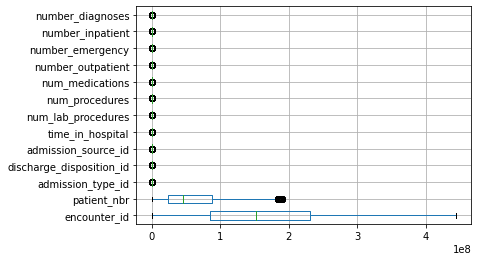

In [11]:
diabetes_numericos.boxplot(vert=False)

#### Diagrama de cajas: representa gráficamente una serie de datos numéricos a través de sus cuartiles.

###### Para obtener los outliers se necesitara obtener el primer y tercer quartil de los datos para obtener los quartiles se utiliza la funcion quantile y dentro de los parentesis se indica el porcentaje que hay en cada quartil

In [39]:
Q1= diabetes_numericos.quantile(0.25)
print("Primer Cuartil",Q1)
Q3=diabetes_numericos.quantile(0.75)
print("Tercer Cuartil",Q1)
IQR= Q3 - Q1
print("Rango Intercuartil",IQR)
Mediana= diabetes_numericos.median()
print('Mediana', Mediana)
Valor_Minimo= diabetes_numericos.min()
print('Valor minimo', Valor_Minimo)
Valor_Máximo=diabetes_numericos.max()
print('Valor maximo', Valor_Máximo)

Primer Cuartil encounter_id                84961194.0
patient_nbr                 23413221.0
admission_type_id                  1.0
discharge_disposition_id           1.0
admission_source_id                1.0
time_in_hospital                   2.0
num_lab_procedures                31.0
num_procedures                     0.0
num_medications                   10.0
number_outpatient                  0.0
number_emergency                   0.0
number_inpatient                   0.0
number_diagnoses                   6.0
Name: 0.25, dtype: float64
Tercer Cuartil encounter_id                84961194.0
patient_nbr                 23413221.0
admission_type_id                  1.0
discharge_disposition_id           1.0
admission_source_id                1.0
time_in_hospital                   2.0
num_lab_procedures                31.0
num_procedures                     0.0
num_medications                   10.0
number_outpatient                  0.0
number_emergency                   0.0
number_

### En ésta ocasión solo veremos el gráfico de barra  "Tiempo en el hospital" ya que al momento de querer hacer un graficos con todas las variables nuestros computadores se quedaban pegagos y se tardama demasiado en ejecutar los comandos

### Grafico de dispersión

####  Nosotros quisimos hacer el grafico hacerca del tiempo del hospital y como se menciono anteriormente solamente escojimos las 10 primeras filas.Con ayuda del comando .head solo se imprimiran los datos que estan arriba y nosotros colocamos el 10 en los parentesis para que solo imprima los 10 primeros valores de la columna 'time_in_hospital' y 'encounter_id'

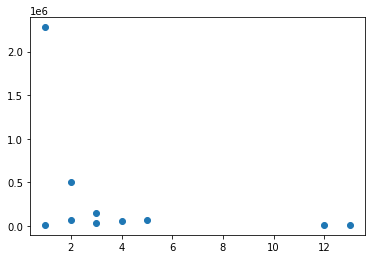

In [24]:
ejex = diabetes['time_in_hospital'].head(10)
ejey = diabetes['encounter_id'].head(10)
plt.scatter(ejex,ejey)

#### Gráfico de dispersión: representa con forma de "burbujas" los valores o conjunto de datos, además, se guía mediante las coordenadas cartesianas

### Grafico de barras

#### Nosotros quisimos hacer el grafico hacerca del tiempo del hospital y como se menciono anteriormente solamente escojimos las 10 primeras filas. Con ayuda del comando .head solo se imprimiran los datos que estan arriba y nosotros colocamos el 10 en los parentesis para que solo imprima los 10 primeros valores

In [21]:
grafico= diabetes.head(10)
grafico

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


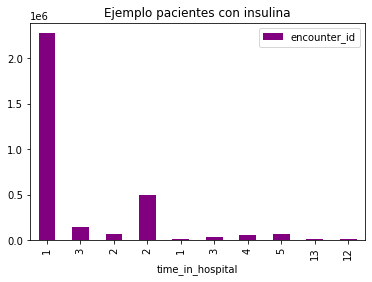

In [22]:
valores1 = grafico[["time_in_hospital","encounter_id"]]
ax = valores1.plot.bar(x="time_in_hospital", y="encounter_id", rot=90, title="Ejemplo pacientes con insulina", color="purple")

#### gráfico de barras: representa mediante barras verticales alguna variable o conjunto de datos.

### Histrograma de frecuencias

(array([4., 2., 1., 1., 0., 0., 0., 0., 0., 2.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

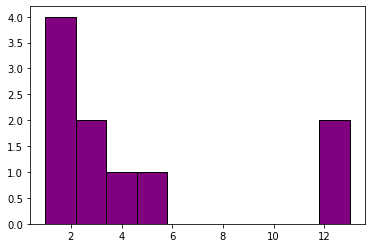

In [23]:
plt.hist(grafico['time_in_hospital'], color="Purple", ec="black")

#### histogramas de frecuencias: representación gráfica de una variable en forma de barras, donde la superficie de cada barra es proporcional a los datos.

## Histograma

#### Lo que haremos acá es que solo se imprimiran todas las columnas con datos numéricos con ayuda del include y finalmente con el .shape imprimira todas las columnas con datos numericos

In [25]:
diabetes_numerico=diabetes.select_dtypes(include=[np.number])
diabetes_numerico.shape

(101766, 13)

In [26]:
diabetes_numerico.columns.values

array(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'], dtype=object)

### Lo que hara este for y el if es que para cada columna que tengan valores mayores a cero(vacíos) se genera una nueva columna 'Perdida' y se guardaran los datos vacíos

In [27]:
for col in diabetes_numerico.columns:
    perdidos = diabetes[col].isnull()
    num_perdido=np.sum(perdidos)
    
    if num_perdido > 0: 
        print('Generando un indicador para:{}'.format(col))
        diabetes['{}_Perdido'.format(col)]=perdidos
perdidos  

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Name: number_diagnoses, Length: 101766, dtype: bool

<AxesSubplot:xlabel='index'>

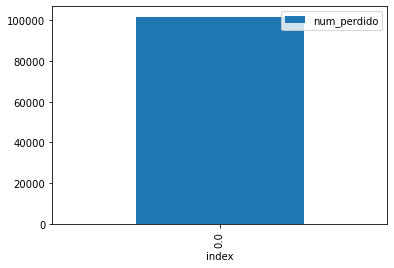

In [28]:
col_perdida=[caracteristica for caracteristica in diabetes.columns if 'Perdido' in caracteristica]
diabetes['num_perdido']=diabetes[col_perdida].sum(axis=1)
diabetes['num_perdido'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_perdido')

## Como podemos ver en la grafica, los datos de tipo int no tiene ningún dato faltante o perdido

#### Ahora lo que haremos acá sera lo mismo que con el histograma anterior la unica diferencia es que solo se imprimiran todas las columnas con datos object con ayuda del exclude y finalmente con el .shape imprimira todas las columnas con datos object

In [29]:
diabetes_no_numerico=diabetes.select_dtypes(exclude=[np.number])
diabetes_no_numerico.shape

(101766, 37)

In [30]:
diabetes_no_numerico.columns.values

array(['race', 'gender', 'age', 'weight', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'], dtype=object)

In [31]:
for col in diabetes_no_numerico.columns:
    perdidos = diabetes[col].isnull()
    num_perdido=np.sum(perdidos)
    
    if num_perdido > 0: 
        print('Generando un indicador para:{}'.format(col))
        diabetes['{}_Perdido'.format(col)]=perdidos
perdidos

0         False
1         False
2         False
3         False
4         False
          ...  
101761    False
101762    False
101763    False
101764    False
101765    False
Name: readmitted, Length: 101766, dtype: bool

<AxesSubplot:xlabel='index'>

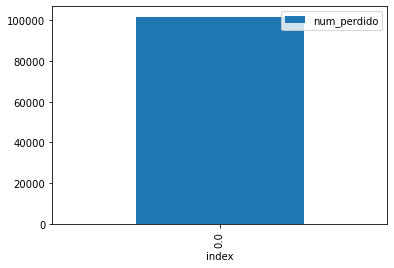

In [32]:
col_perdida=[caracteristica for caracteristica in diabetes.columns if 'Perdido' in caracteristica]
diabetes['num_perdido']=diabetes[col_perdida].sum(axis=1)
diabetes['num_perdido'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_perdido')

### Como podemos ver en la grafica, los datos de tipo object no tiene ningún dato faltante o perdido

# Identificar valores inusuales (outliers)

##### Acá podemos identificar que los puntos que se encuentran fuera de la caja son los outliers, esto lo podemos sacar con ayuda del metodo .boxplot y el vert que vemos en el parentesis es para que se vea verticalmente

<AxesSubplot:>

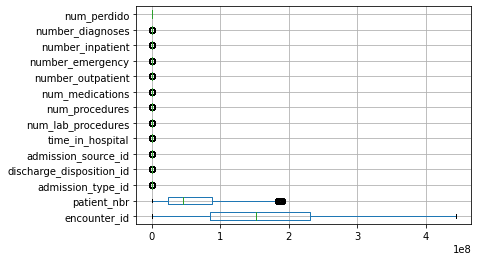

In [33]:
diabetes.boxplot(vert=False)

##### Para obtener los outliers se necesitara obtener el primer y tercer quartil de los datos para obtener los quartiles se utiliza la funcion quantile y dentro de los parentesis se indica el porcentaje que hay en cada quartil

In [34]:
Q1= diabetes.quantile(0.25)
print("Primer Cuartil",Q1)
Q3=diabetes.quantile(0.75)
print("Tercer Cuartil",Q1)
IQR= Q3 - Q1
print("Rango Intercuartil",IQR)

Primer Cuartil encounter_id                84961194.0
patient_nbr                 23413221.0
admission_type_id                  1.0
discharge_disposition_id           1.0
admission_source_id                1.0
time_in_hospital                   2.0
num_lab_procedures                31.0
num_procedures                     0.0
num_medications                   10.0
number_outpatient                  0.0
number_emergency                   0.0
number_inpatient                   0.0
number_diagnoses                   6.0
num_perdido                        0.0
Name: 0.25, dtype: float64
Tercer Cuartil encounter_id                84961194.0
patient_nbr                 23413221.0
admission_type_id                  1.0
discharge_disposition_id           1.0
admission_source_id                1.0
time_in_hospital                   2.0
num_lab_procedures                31.0
num_procedures                     0.0
num_medications                   10.0
number_outpatient                  0.0
number_

###### Para identificar los bigotes de la grafica se determina sabiendo la ubicacion del bigote inferior y superior
###### Calcular el bigote inferior es restando el Q1 menos 1.5 y el resultado se multiplica por el IQR
###### Calcular el bigote superior es sumando el Q1 mas 1.5 y el resultado se multiplica por el IQR

In [35]:
VI= (Q1 - 1.5 * IQR)
print('VI_Calculado=',VI )
VS= (Q3 + 1.5 * IQR)
print('VS_Calculado=',VS )

VI_Calculado= encounter_id               -1.330033e+08
patient_nbr                -7.278587e+07
admission_type_id          -2.000000e+00
discharge_disposition_id   -3.500000e+00
admission_source_id        -8.000000e+00
time_in_hospital           -4.000000e+00
num_lab_procedures         -8.000000e+00
num_procedures             -3.000000e+00
num_medications            -5.000000e+00
number_outpatient           0.000000e+00
number_emergency            0.000000e+00
number_inpatient           -1.500000e+00
number_diagnoses            1.500000e+00
num_perdido                 0.000000e+00
dtype: float64
VS_Calculado= encounter_id                4.482354e+08
patient_nbr                 1.837450e+08
admission_type_id           6.000000e+00
discharge_disposition_id    8.500000e+00
admission_source_id         1.600000e+01
time_in_hospital            1.200000e+01
num_lab_procedures          9.600000e+01
num_procedures              5.000000e+00
num_medications             3.500000e+01
number_outpati

##### Ahora para detectar los outliers se debe encontrar las filas cuyo valor en las columnas sea menor al bigote inferior calculado o mayor al bigote superior calculado
##### Ahora cuando un valor es outliers el valor resultante debera ser un TRUE

In [36]:
ubicacion_outliders=(diabetes < VI) | (diabetes > VS)
ubicacion_outliders

<ipython-input-36-daae96b7e6a9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ubicacion_outliders=(diabetes < VI) | (diabetes > VS)
<ipython-input-36-daae96b7e6a9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ubicacion_outliders=(diabetes < VI) | (diabetes > VS)


,A1Cresult,acarbose,acetohexamide,admission_source_id,admission_type_id,age,change,chlorpropamide,citoglipton,diabetesMed,...,pioglitazone,race,readmitted,repaglinide,rosiglitazone,time_in_hospital,tolazamide,tolbutamide,troglitazone,weight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Como se ve en la imagen no se encuentra nigún dato outliers

In [37]:
outliders = diabetes[ubicacion_outliders]
outliders

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_perdido
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Con ayuda del método dtypes nos ayudará a ver que tipo de datos se encuentran en las columnas de la tabla (int,float..etc).

In [38]:
diabetes.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              